# K2c02 Summary Statistics for YSO Sample
##  Calculate the summary statistics for the K2 C2 control sample lightcurves
Michael Gully-Santiago  
January-February 2016

Here we are looking at everything in K2 Cycle 2 that is was NOT among the 1678 sources proposed to be YSOs.

We do everything else identically to the YSO sample.

**The result is a $N\sim2000 \times 12 $ dataset of summary statistics for each K2 C2 lightcurve.**  
The columns are identical to the YSO dataset.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
from astropy.utils.console import ProgressBar
import warnings

### List all the file names.  
There's a wget script in the `control/data` directory that will automatically fetch each file.

In [2]:
!ls ../control/data/hl* > control_file_list.csv

In [3]:
file_list_raw = pd.read_csv('control_file_list.csv', names=['fname'])
file_list = file_list_raw.fname.values

### Compute the descriptive statistics for all $\sim2000$ control sample lightcurves from K2 Cycle 02.  

In [6]:
columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
agg_data = pd.DataFrame(columns=columns)

n_files = len(file_list)

In [7]:
with ProgressBar(n_files, ipython_widget=True) as bar:
    for i in range(n_files):
        bar.update()
        file = file_list[i]
        raw_lc = pd.read_csv(file, index_col=False)
        agg_data.loc[i] = raw_lc[' Corrected Flux'].describe()

In [8]:
agg_data['fname'] = file_list_raw.fname
agg_data['EPIC_ID'] = agg_data['fname'].str[41:41+9]

In [10]:
agg_data.head(3)

,count,mean,std,min,25%,50%,75%,max,fname,EPIC_ID
0,3311,1.018054,0.047893,0.902994,0.982433,1.016658,1.051779,1.249504,../control/data/hlsp_k2sff_k2_lightcurve_20248...,202483641
1,3148,1.001295,0.002324,0.997441,0.998882,1.000759,1.003787,1.005510,../control/data/hlsp_k2sff_k2_lightcurve_20248...,202488467
2,3196,1.006182,0.010259,0.990222,0.995677,1.004804,1.017156,1.020807,../control/data/hlsp_k2sff_k2_lightcurve_20249...,202491250


### Plots

In [11]:
agg_data['logstd'] = np.log10(agg_data['std'])
agg_data['logiqr'] = np.log10(agg_data['75%']-agg_data['25%'])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


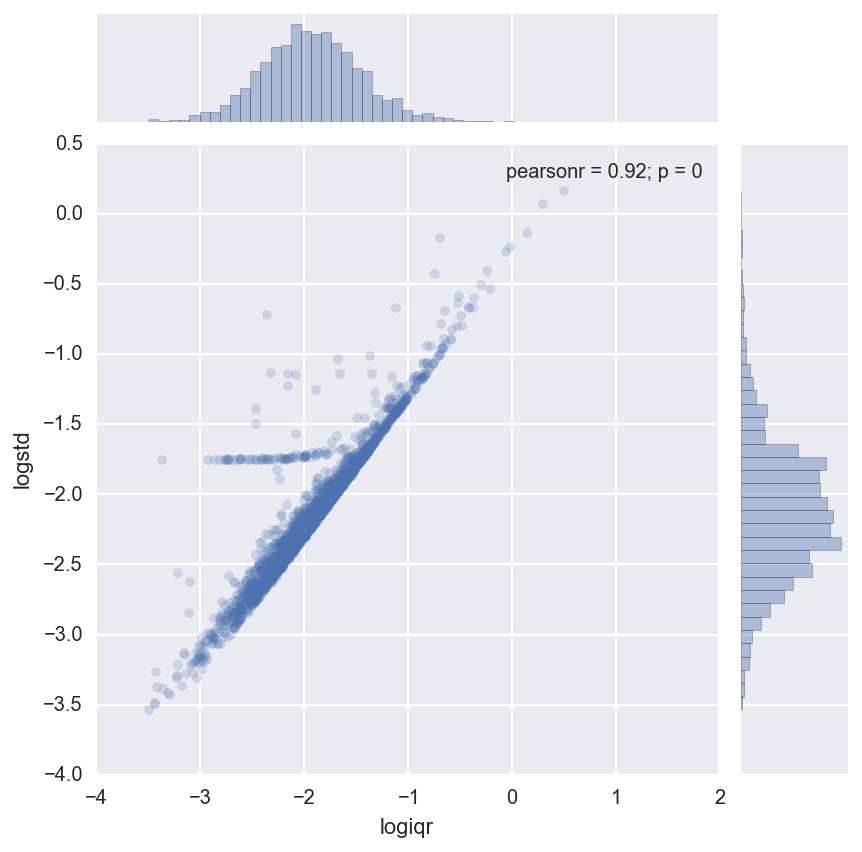

In [12]:
tp = sns.jointplot(x="logiqr", y="logstd", alpha=0.2, kind='scatter',data=agg_data, xlim=(-4, 2));

The scatter of standard deviation above the interquartile range reflects sources with extra flicker noise beyond just secular sinusoidal variation.

In [14]:
ad = agg_data.dropna()
agg_data.shape, ad.shape

((2083, 12), (2083, 12))

None of the lightcurves habe `NaN` values.  That's nice.

# Save the control sample as `.csv`, just like the YSO sample.

In [15]:
new_col_order = ['EPIC_ID','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'logstd', 'logiqr','fname']

In [16]:
ad = ad[new_col_order]
ad.head(2)

,EPIC_ID,count,mean,std,min,25%,50%,75%,max,logstd,logiqr,fname
0,202483641,3311,1.018054,0.047893,0.902994,0.982433,1.016658,1.051779,1.249504,-1.319729,-1.158974,../control/data/hlsp_k2sff_k2_lightcurve_20248...
1,202488467,3148,1.001295,0.002324,0.997441,0.998882,1.000759,1.003787,1.005510,-2.633826,-2.309333,../control/data/hlsp_k2sff_k2_lightcurve_20248...


In [17]:
ad.to_csv('../analysis/K2C02_control_agg_data.csv', index=False)

# The end.